# Ridge Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_diabetes
data=load_diabetes()
X=data.data
y=data.target

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [26]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=2)
r.fit(X_train,y_train)

Ridge(alpha=2)

In [27]:
y_pred1=r.predict(X_train)
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_train,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred1)))

R2 score 0.3663401991351364
RMSE 62.58034551318272


In [28]:
y_pred=r.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.3943267798085952
RMSE 54.66789879566599


# 1. How are coefficients affected?

In [29]:
coefs = []
r2_scores = []

for i in [0,10,100,1000]:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))
    

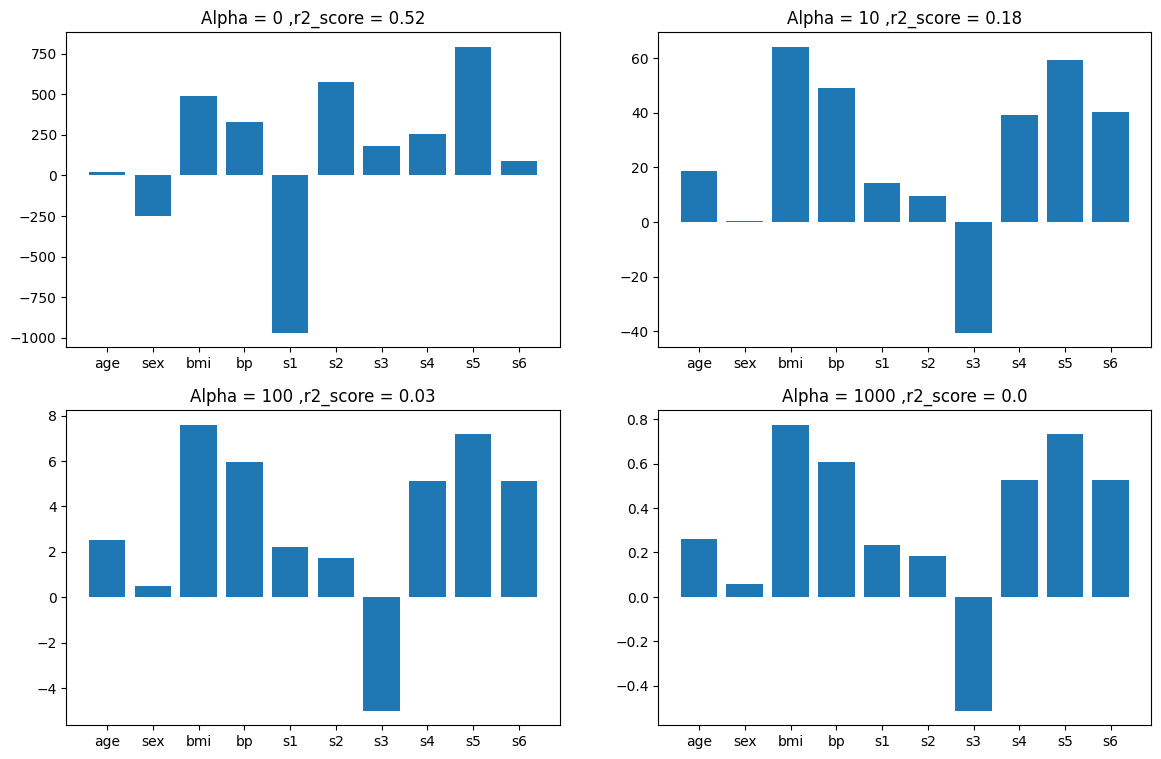

In [30]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 100 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 1000 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

# 2. Higher Coefficients are affected more

In [31]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [32]:
input_array = np.array(coefs)
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,23.454654,-247.427474,492.108752,329.358764,-970.797230,573.542955,182.421624,255.921682,794.216093,89.322492
0.0001,23.517635,-247.317667,492.282449,329.331759,-957.463244,562.903103,176.710702,254.470333,789.108676,89.413758
0.0010,24.016144,-246.406044,493.592860,329.088330,-852.767736,479.424669,131.866827,243.032920,748.964644,90.155083
0.0100,26.261811,-240.399342,496.575080,326.659983,-420.981791,137.891804,-53.056922,194.223144,581.450282,94.313693
0.1000,31.033892,-204.830591,464.896345,304.964149,-95.760370,-87.529692,-183.818093,147.497940,425.853925,110.215599
1.0000,42.955098,-67.887067,280.270383,195.506087,0.015036,-30.813126,-145.767246,114.715808,243.273028,120.912940
10.0000,18.777884,0.364232,64.215213,49.175535,14.439729,9.623399,-40.539280,39.321539,59.201623,40.365253
100.0000,2.508376,0.499954,7.600231,5.950702,2.220424,1.729273,-5.003424,5.100126,7.167275,5.128502
1000.0000,0.259179,0.056343,0.774914,0.608267,0.232655,0.183516,-0.512558,0.525412,0.732780,0.527023


# 3. Impact on Bias and Variance

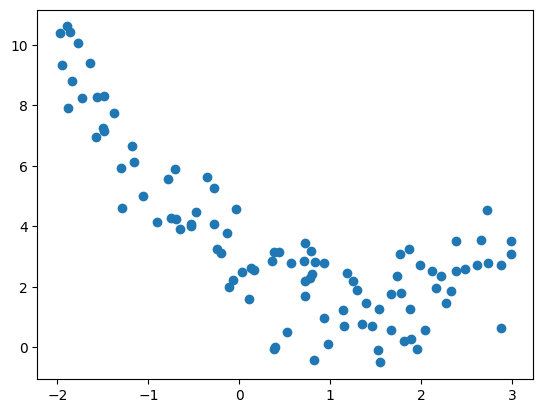

In [37]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)


In [48]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)


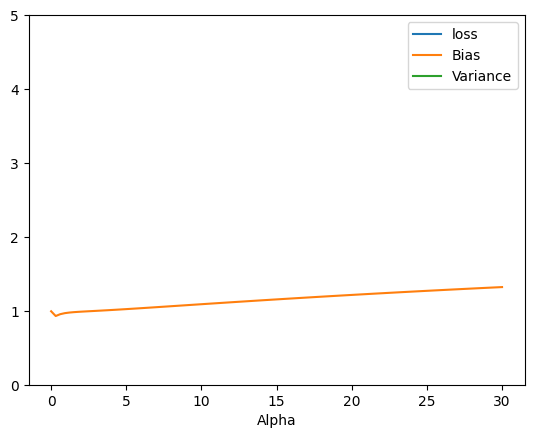

In [49]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()

# 4. Effect of Regularization on Loss Function

[27.82809103]
-2.29474455867698


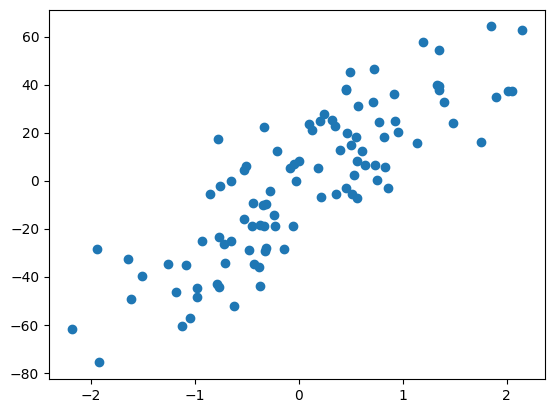

In [50]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [51]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m
def predict(m):
    return m*X - 2.29

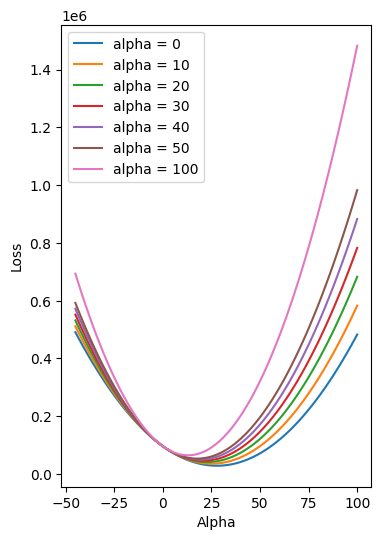

In [52]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()